# CSE 144 Fall 2023 HW 1

In this assignment, the goal is to build a linear regression model to predict the song popularity based on energy, acoustics, instumentalness, liveness, dancibility, etc. We'll be using the [Song Popularity Dataset](https://www.kaggle.com/datasets/yasserh/song-popularity-dataset) dataset from Kaggle dataset.

In the first section, you'll perform standard data preprocessing using techniques we covered in class, including binning, one-hot encoding, feature crossing, and normalization. In the second section, you'll train a simple linear regression model to predict the song popularity

## Instruction

- Submit your assignments onto **Canvas** by the due date.
- This is an **individual** assignment. All help from others (from the web, books other than text, or people other than the TA or instructor) must be clearly acknowledged.
- Don't change the input and output structure of pre-defined functions. Most coding parts can be finished with about 5-6 lines of codes.
- You should be able to use NumPy, Pandas, and the `train_test_split()` function from scikit-learn to complete everything in this assignment. We also imported Matplotlib for you to visualize the training and validation loss.
- Remember that tuning on the test loss is prohibited.

## Rubric

The assignment is worth 50 (47+3) points in total:
- Data preprocessing (12 points)
    - drop missing values (2 points)
    - drop outliers (5 points)
    - normalization (5 points)
- Dataset split (10 points)
    - test set split (5 points)
    - k-fold train and validation set split (5 points)
- Linear regression (25 points)
    - MSE_loss (3 points)
    - Gradient (5 points)
    - Theta initialization (3 points)
    - Translate dataframe to numpy (3 points)
    - Traininig (5 points)
        - Save train and val loss (2 points)
        - Update parameters (3 points)
    - Find best parameters (3 points)
    - Evaluate on test set (3 points)

- Bonus (3 points)
    - If your test loss is below 0.025

In [1]:
!python --version

Python 2.7.18


In [17]:
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import random
seed = 144
random.seed(seed)
np.random.seed(seed)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


array([[<Axes: title={'center': 'song_popularity'}>,
        <Axes: title={'center': 'song_duration_ms'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'audio_mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'audio_valence'}>, <Axes: >, <Axes: >]],
      dtype=object)

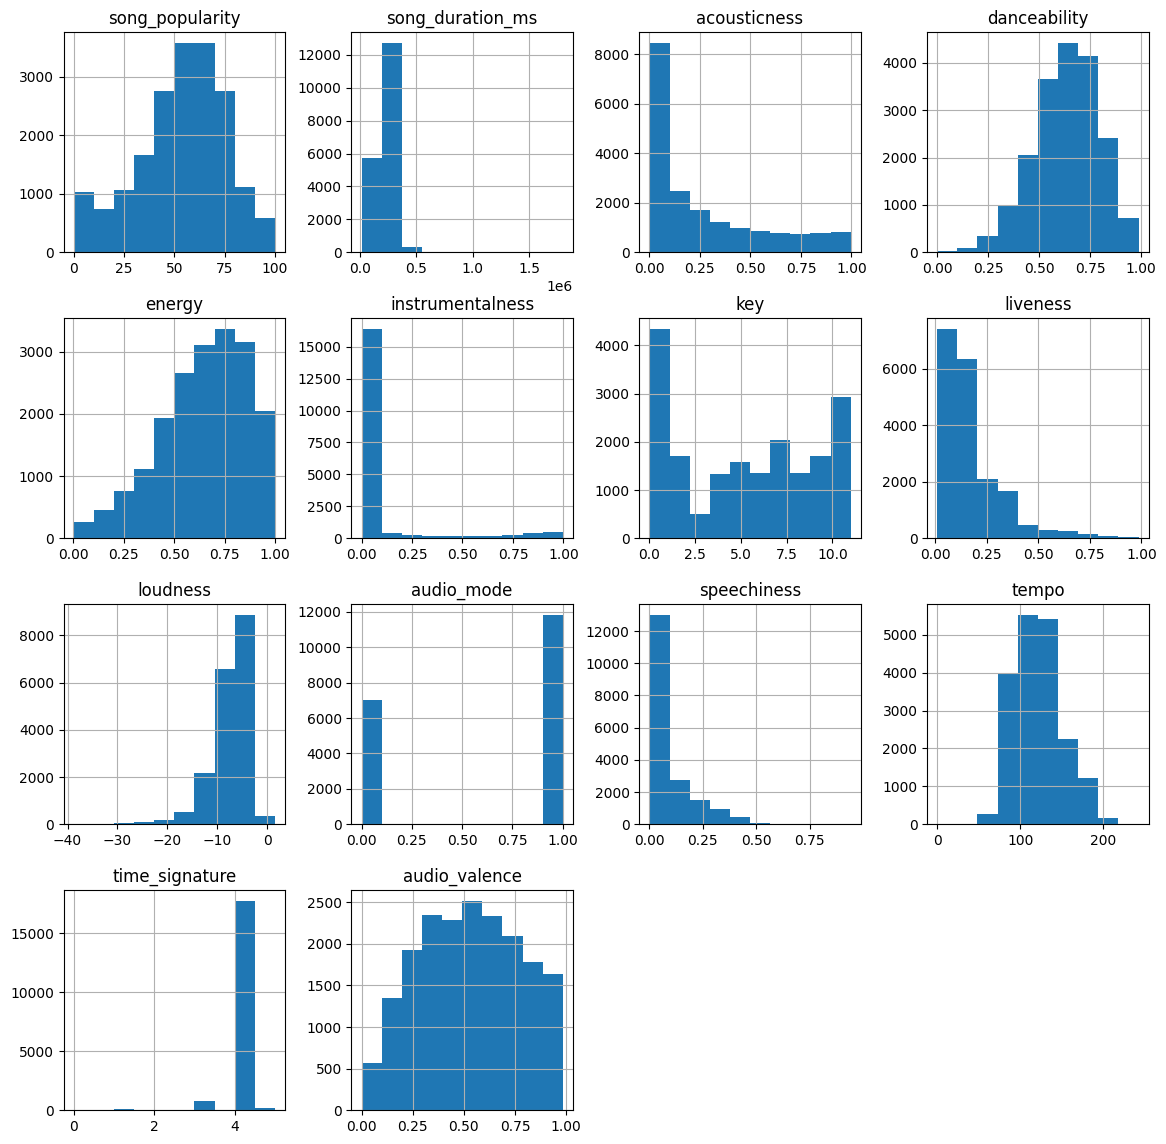

In [18]:
# Load data
data = pd.read_csv("./song_data.csv").drop(["song_name"], axis = 1)

# Visualize data
data.info()
data.hist(figsize=(14,14))

In [19]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

### Data Cleaning
`data.info()` shows that there are some missing values in the dataset. Also, we can see from the histogram that outliers exist for some features. Moreover, the range of different features has a huge gap: most in (0,1), but some are on the order of 1e2, or even 1e5. In the following you need to perform:
1. Drop rows that contain NULL values.
2. Remove outliers for features in ['song_duration_ms', 'instrumentalness'] based on interquantile range.
3. Scale ranges of independent variables using Z-score method, and normalize the range of dependent feature ['song_popularity'] from [0,100] to [0,1]

In [20]:
# drop rows that have NULL value
# ========== YOUR CODE STARTS HERE ==========
# ========== YOUR CODE ENDS HERE ============
data = data.dropna()
#data.info()


'''
Remove outliers for features in ['song_duration_ms', 'instrumentalness']
based on interquantile range. Here for each feature, we first sort data in an ascending order.
Let q1 and q3 be the data that ranks 25% and 75% respectively. We then let iqr = q3 - q1, and
compute
                a = q1 - iqr x 1.5,
                b = q3 + iqr x 1.5,
and remove the data out of the range [a, b].
Note: this can be realized with function quantile().
'''
for feature in ['song_duration_ms', 'instrumentalness']:
    # ========== YOUR CODE STARTS HERE ==========
    # first, sort data.
    # loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    #data = data.sort_values(by = feature)
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    a = q1 - iqr * 1.5
    b = q3 + iqr * 1.5
    print(feature, a, b)
    data = data[(data[feature] >= a) & (data[feature] <= b)]
    #print("test, ", (data[feature] >= a) & (data[feature] <= b).info())

print('after thingy')
#data.info()
    # ========== YOUR CODE ENDS HERE ============

data = data.reset_index(drop=True)
'''
Scale all features using z-score normalization.
Note: use different column and std for different columns!
'''
# ========== YOUR CODE STARTS HERE ==========

for column in data:
    data[column] = (data[column] - data[column].mean())/(data[column].std() * 100)

# ========== YOUR CODE ENDS HERE ============

song_duration_ms 96582.75 330600.75
instrumentalness -0.0027075 0.0045125
after thingy


Now we visualize the data again.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14143 entries, 0 to 14142
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   14143 non-null  float64
 1   song_duration_ms  14143 non-null  float64
 2   acousticness      14143 non-null  float64
 3   danceability      14143 non-null  float64
 4   energy            14143 non-null  float64
 5   instrumentalness  14143 non-null  float64
 6   key               14143 non-null  float64
 7   liveness          14143 non-null  float64
 8   loudness          14143 non-null  float64
 9   audio_mode        14143 non-null  float64
 10  speechiness       14143 non-null  float64
 11  tempo             14143 non-null  float64
 12  time_signature    14143 non-null  float64
 13  audio_valence     14143 non-null  float64
dtypes: float64(14)
memory usage: 1.5 MB


array([[<Axes: title={'center': 'song_popularity'}>,
        <Axes: title={'center': 'song_duration_ms'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'audio_mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'audio_valence'}>, <Axes: >, <Axes: >]],
      dtype=object)

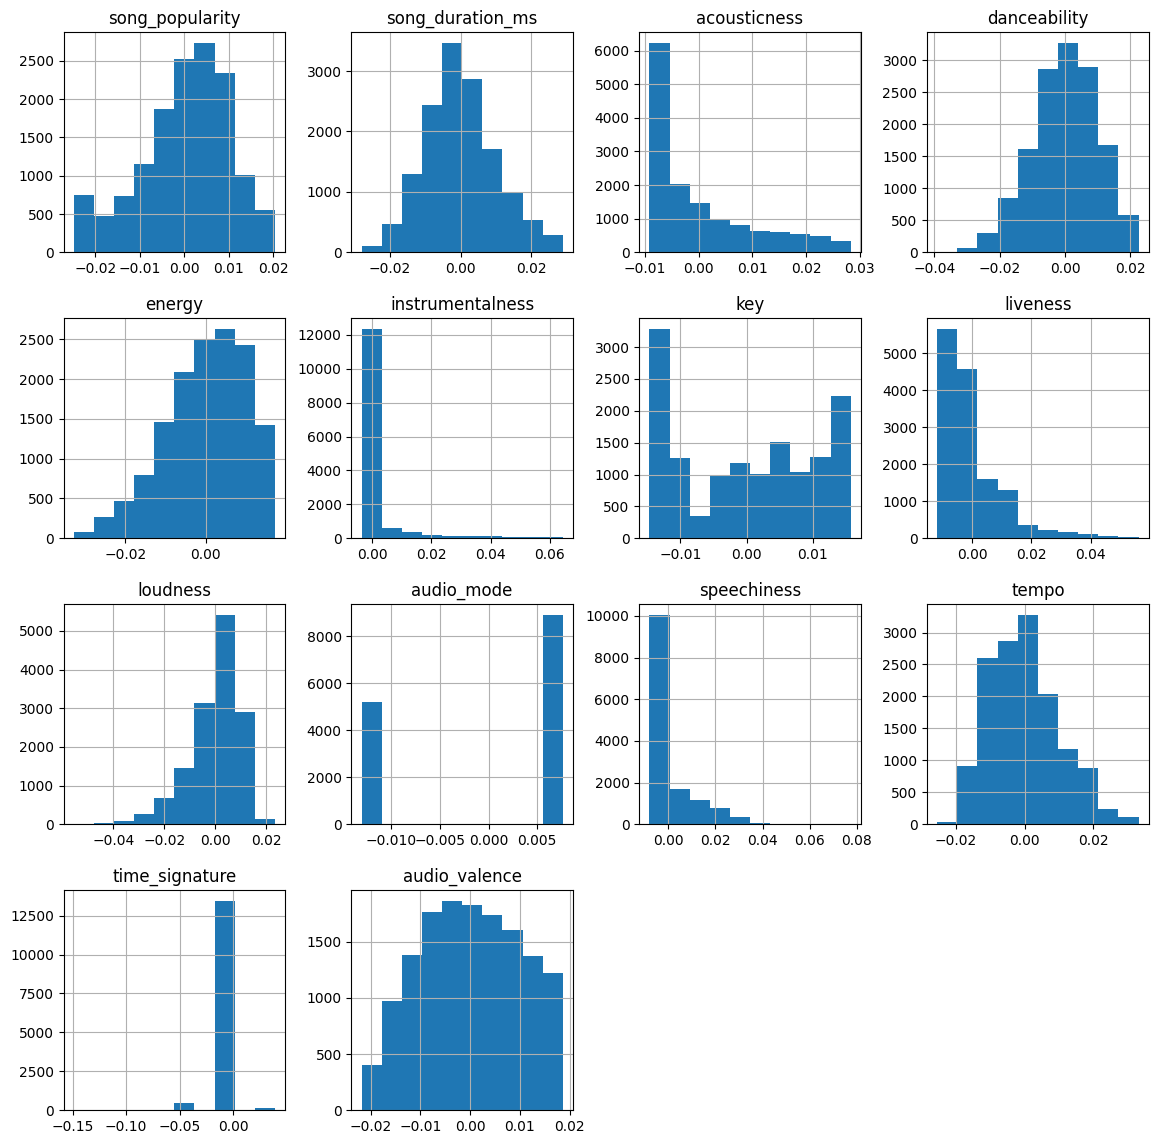

In [21]:
data.info()
data.hist(figsize=(14,14))

## Dataset preparation
Next we will split dataset to train set, validation set and test set. First we randomly choose 30% as test set. Then we use $k$-fold validation on the remaining 70% to generate $k$ different train set and validation set pairs, where $k=5$.

In [32]:
def test_split(data, test_size: float=0.3, seed=seed):
    '''
    Use function train_test_split() to split test set.
    '''
    # ========== YOUR CODE STARTS HERE ==========

    label = "song_popularity"
    train_ds, test_ds = train_test_split(data, test_size = test_size)
    X_train_val = train_ds.copy()
    X_test = test_ds.copy()

    y_train_val = X_train_val.pop(label) # this is a series
    y_test = X_test.pop(label)
    #y_test.reshape(y_test.size, 1)

    # ========== YOUR CODE ENDS HERE ============

    return (X_train_val.reset_index(drop=True),
            y_train_val.reset_index(drop=True),
            X_test.reset_index(drop=True),
            y_test.reset_index(drop=True))


def train_val_split(X_train_val, y_train_val, k=5, seed=seed):
    '''
    Use given index sets to generate k train and validation pairs. The return value should be
    a list whose components are tuples:
    [(X_train1, y_train1, X_val1, y_val1), ..., (X_traink, y_traink, X_valk, y_valk)]

    Here suppose data length is 10, the index sets could be like:
                    [[2,5], [1,6], [3,8], [9,4], [0,7]]
    '''
    index_shuffle = list(X_train_val.index)
    random.shuffle(index_shuffle)
    index_split_list = [[index_shuffle[i+j] for i in range(0, len(index_shuffle), 5)  if i+j<len(index_shuffle)] for j in range(5)]
    train_val_pairs = [0 for i in range(k)]
    # ========== YOUR CODE STARTS HERE ==========

    for i in range(k):
        foo = [] #list with xtrain1, ytrain1, xval1, yval1
        training_set_index = index_split_list.copy()
        x_partition = X_train_val.copy()
        y_partition = y_train_val.copy()

        val_set_index = training_set_index.pop(i)

        X_train = x_partition.iloc[sum(training_set_index, [])]
        y_train = y_partition.iloc[sum(training_set_index, [])]

        X_val = x_partition.iloc[val_set_index]
        y_val = y_partition.iloc[val_set_index]

        train_val_pairs[i] = tuple([X_train, y_train, X_val, y_val])



    # ========== YOUR CODE ENDS HERE ============
    return train_val_pairs

X_train_val, y_train_val, X_test, y_test = test_split(data)
train_val_pairs = train_val_split(X_train_val, y_train_val)
# print(X_test.info)
# print(X_train_val.info)

In [34]:
from math import e
def MSE_loss(pred: np.ndarray, target: np.ndarray):
    # ========== YOUR CODE STARTS HERE ==========
    target = target.reshape(-1, 1)
    error = pred - target
    return (np.square(error)).mean()

    # ========== YOUR CODE ENDS HERE ============

def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray):
    # ========== YOUR CODE STARTS HERE ==========
    errors = y - X.dot(theta)
    gradient = -(X.T).dot(errors)
    return gradient

    # ========== YOUR CODE ENDS HERE ============


num_epochs = 2000
learning_rate = 1e-3
k = 5
train_loss_history = [list([None] * num_epochs) for _ in range(k)]
val_loss_history = [list([None] * num_epochs) for _ in range(k)]

theta_min = None
index_min = None
loss_min = None

for i in range(k):
    X_train, y_train, X_val, y_val = train_val_pairs[i]
    # Translate dataframe to numpy
    # ========== YOUR CODE STARTS HERE ==========
    X_t = X_train.to_numpy()
    y_t = y_train.to_numpy()
    print(y_t.size)
    y_t = y_t.reshape((y_t.size, 1))

    X_v = X_val.to_numpy()
    y_v = y_val.to_numpy()
    # ========== YOUR CODE ENDS HERE ============
    #print()
    #print(X_t.info)
    #print()
    # Initialize theta
    # ========== YOUR CODE STARTS HERE ==========
    val_loss = None
    theta = np.zeros((X_t.shape[1], 1))
    print("theta", theta.shape)
    print(X_t.shape)

    # ========== YOUR CODE ENDS HERE ============

    for epoch in range(num_epochs):
        # Compute loss, and save to train_loss_history and val_loss_history
        # ========== YOUR CODE STARTS HERE ==========
        # print("Shape"X_t.shape)
        t_hypothesis = np.dot(X_t, theta)
        v_hypothesis = np.dot(X_v, theta)
        #print(t_hypothesis.shape, "T_hypothesis")

        train_loss = MSE_loss(t_hypothesis.T, y_t)
        print(train_loss)
        val_loss = MSE_loss(v_hypothesis.T, y_v)

        train_loss_history[i][epoch] = train_loss #get loss value.
        val_loss_history[i][epoch] = val_loss #
        # ========== YOUR CODE ENDS HERE ============

        # Update parameter
        # ========== YOUR CODE STARTS HERE ==========
        """print("Shapes: xt, yt, theta")
        print(X_t.shape)
        print(y_t.shape)
        print(theta.shape)"""
        grad = gradient(X_t, y_t, theta)
        #print("gradient, ", grad.shape)
        theta = theta - (grad * learning_rate)
        #print(theta)
        # add because gradient returns negative val
        # ========== YOUR CODE ENDS HERE ============


    # Inference on validation set, and fine the best parameters. Save corresponding parameters and index in theta_min and  index_min
    # ========== YOUR CODE STARTS HERE ==========

    # calculate index_min based on val_loss_history
    # check_val_los_history at index_min

    if loss_min is None or val_loss < loss_min:
        loss_min = val_loss
        index_min = i
        theta_min = theta
    # ========== YOUR CODE ENDS HERE ============


print(f"Final train loss for the best model: {train_loss_history[index_min][-1]}")
print(f"Final validation loss for the best model: {val_loss_history[index_min][-1]}")
print(theta_min)

plt.plot(np.arange(num_epochs), train_loss_history[index_min], label="Train loss")
plt.plot(np.arange(num_epochs), val_loss_history[index_min], label="Val loss")
plt.title("Train + validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()/


# Evaluate on test set
# ========== YOUR CODE STARTS HERE ==========
#X_test.reshape()
#print("X_test", X_test.shape)
#print("theta_min", theta_min.shape)
test_h = np.dot(X_test, theta_min)
#print("test_h", test_h.shape)
y_test = y_test.to_numpy()
test_loss = MSE_loss(test_h.T, y_test)
#print("y_test", y_test.shape)

# ========== YOUR CODE ENDS HERE ============
print(f"Test loss: {test_loss}")

7920
theta (13, 1)
(7920, 13)
0.00010304719781135987
0.00010304719785410887
0.00010304720624326486
0.00010304722294608059
0.00010304724792992842
0.00010304728116230255


KeyboardInterrupt: 